<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/%5BPROJETO%5DClassifica%C3%A7%C3%A3o_para_sa%C3%BAde_fetal_com_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de classificação para saúde fetal
Cardiotocography (CTG) é uma técnica de monitoramento utilizada durante a gravidez e o trabalho de parto para avaliar os batimentos cardíacos fetais e as contrações uterinas. Trata-se de um procedimento não invasivo que envolve a fixação de sensores no abdômen da mãe para monitorar a frequência cardíaca fetal (FCF) e as contrações uterinas. O CTG é uma ferramenta essencial em obstetrícia para avaliar o bem-estar fetal e detectar sinais de angústia ou complicações durante a gravidez e o parto.
<p align=center>
<img src="https://img.freepik.com/fotos-gratis/mae-pai-e-filha-assistindo-a-imagem-de-ultrassom-do-bebe-familia-com-roupas-leves-familia-esperando-um-bebe_1157-46788.jpg?t=st=1710889687~exp=1710893287~hmac=768bfafaea72ef57a6ca92931c647fd5cdf569cc3653f36256c54df9f3f4cf98&w=996" width="90%"></p>

Em resumo, a cardiotocografia desempenha um papel vital nos cuidados obstétricos, fornecendo monitoramento contínuo da frequência cardíaca fetal e das contrações uterinas, permitindo a detecção oportuna de angústia fetal e orientando a tomada de decisões clínicas durante a gravidez e o parto. Sua importância reside em melhorar os resultados tanto para as mães quanto para os bebês, identificando e abordando prontamente potenciais complicações.

Neste projeto, vou utilizar o framework PyCaret para construir um modelo de classificação da saúde do feto, utilizando um dataset real e completo.

# Dicionario de variaveis
baseline-value: Valor de referência da Frequência Cardíaca Fetal

accelerations: Número de acelerações por segundo

fetal_movement: Número de movimentos fetais por segundo

uterine_contractions: Número de contrações uterinas por segundo

light_decelerations: Número de desacelerações leves por segundo

severe_decelerations: Número de desacelerações graves por segundo

prolongued_decelerations: Número de desacelerações prolongadas por segundo

abnormal_short_term_variability: Porcentagem de tempo com variabilidade de curto prazo anormal

mean_value_of_short_term_variability: Valor médio da variabilidade de curto prazo

percentage_of_time_with_abnormal_long_term_variability: Porcentagem de tempo com variabilidade de longo prazo anormal

mean_value_of_long_term_variability: Valor médio da variabilidade de longo prazo

histogram_width: Largura do histograma feito usando todos os valores de um registro

histogram_min: Valor mínimo do histograma

histogram_max: Valor máximo do histograma

histogram_number_of_peaks: Número de picos no histograma do exame

histogram_number_of_zeroes: Número de zeros no histograma do exame

histogram_mode: Modo do histograma

histogram_mean: Média do histograma

histogram_variance: Variância do histograma

histogram_tendency: Tendência do histograma

fetal_health: Saúde fetal: 1 - Normal 2 - Suspeito 3 - Patológico

**Estes são 2126 registros de características extraídas de exames de Cardiotocograma, que foram então classificados por três obstetras especialistas em 3 classes:**

*1=Normal*

*2=Suspeito*

*3=Patológico*


Portanto, neste projeto, nosso alvo é a coluna 'fetal-health'.

Normalmente, removeríamos os outliers, pois eles representam erros na coleta de dados, mas neste caso estamos certos sobre a precisão dos dados e remover linhas de outliers seria injusto.

In [ ]:
!pip install pycaret pandas shap

In [3]:
import pandas as pd
from pycaret.classification import *
from google.colab import files

In [4]:
uploaded = files.upload()

Saving fetal_health.csv to fetal_health.csv


In [5]:
# Carregar o dataset
df = pd.read_csv('fetal_health.csv')
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [17]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

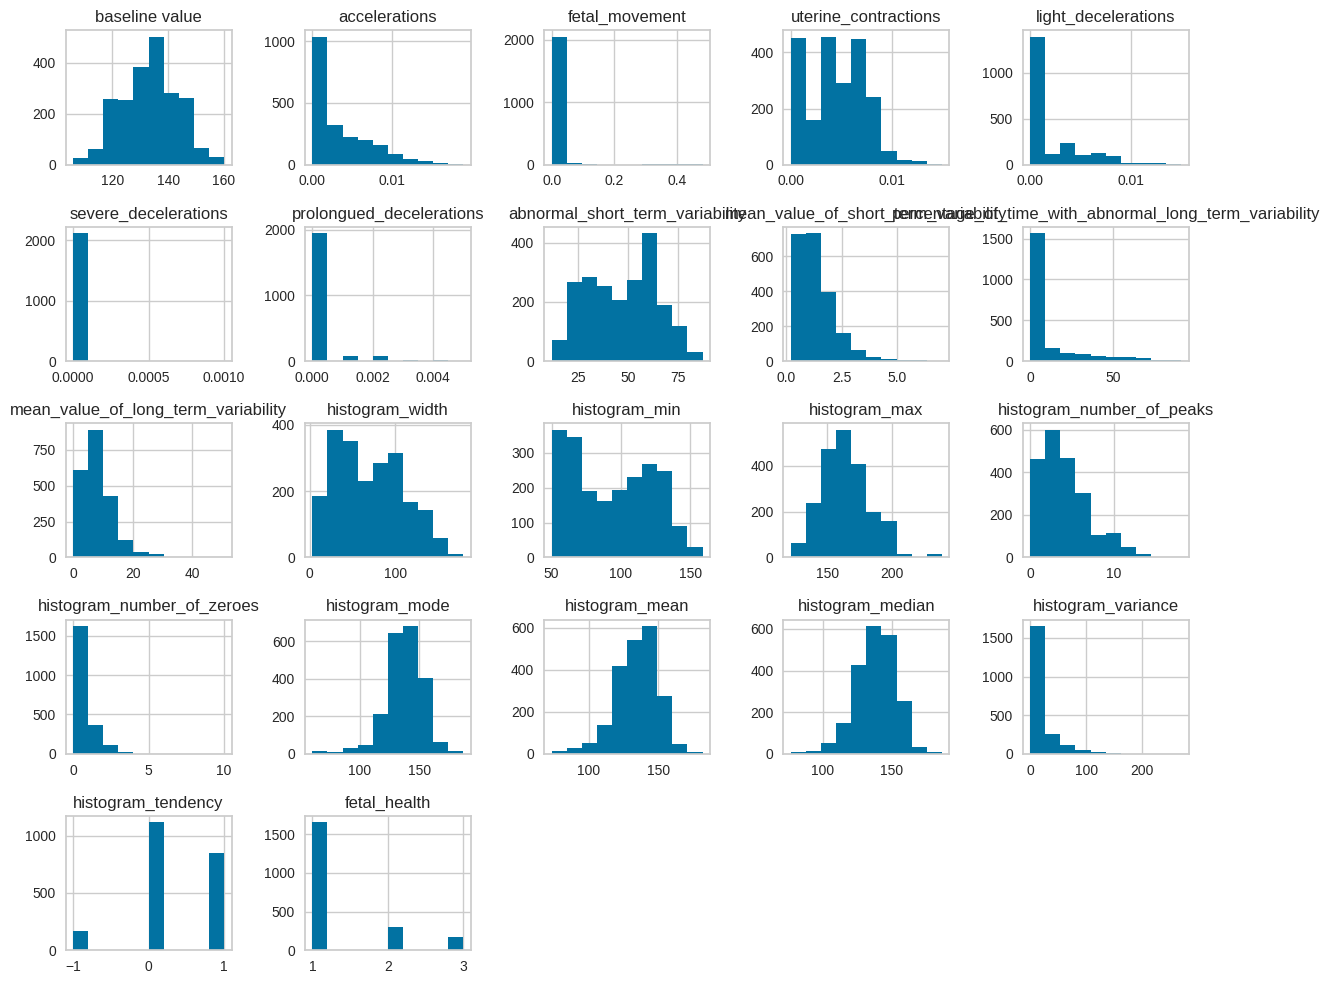

In [18]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Modelo de machine learning
Após uma breve análise exploratória, nossos dados estão prontos para serem utilizados em um modelo de classificação. Vou empregar a biblioteca PyCaret para me auxiliar nessa tarefa.

In [7]:
data = df

In [8]:
# Configurar o ambiente
clf = setup(data=data, target='fetal_health',
            session_id=123,
            train_size=0.8,
            normalize=True,
            transformation=False,
            remove_outliers=False,
            data_split_shuffle=True)

,Description,Value
0,Session id,123
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(2126, 22)"
5,Transformed data shape,"(2126, 22)"
6,Transformed train set shape,"(1700, 22)"
7,Transformed test set shape,"(426, 22)"
8,Numeric features,21
9,Preprocess,True


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9576,0.0000,0.9576,0.9580,0.9571,0.8823,0.8834,1.0030
xgboost,Extreme Gradient Boosting,0.9559,0.0000,0.9559,0.9568,0.9556,0.8783,0.8793,0.2320
gbc,Gradient Boosting Classifier,0.9535,0.0000,0.9535,0.9533,0.9527,0.8702,0.8715,1.2380
rf,Random Forest Classifier,0.9424,0.0000,0.9424,0.9428,0.9409,0.8378,0.8401,0.3350
et,Extra Trees Classifier,0.9276,0.0000,0.9276,0.9264,0.9249,0.7934,0.7970,0.2430
dt,Decision Tree Classifier,0.9171,0.0000,0.9171,0.9204,0.9177,0.7747,0.7762,0.0530
knn,K Neighbors Classifier,0.8988,0.0000,0.8988,0.8956,0.8941,0.7039,0.7094,0.0600
lr,Logistic Regression,0.8953,0.0000,0.8953,0.8952,0.8940,0.7090,0.7109,0.7920
lda,Linear Discriminant Analysis,0.8841,0.0000,0.8841,0.8857,0.8803,0.6690,0.6734,0.0720
ada,Ada Boost Classifier,0.8818,0.0000,0.8818,0.8849,0.8803,0.6674,0.6714,0.2770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9647,0.0000,0.9647,0.9647,0.9638,0.8984,0.9005
1,0.9529,0.0000,0.9529,0.9540,0.9529,0.8705,0.8709
2,0.9588,0.0000,0.9588,0.9592,0.9585,0.8839,0.8845
3,0.9824,0.0000,0.9824,0.9838,0.9825,0.9524,0.9528
4,0.9529,0.0000,0.9529,0.9526,0.9526,0.8702,0.8707
5,0.9588,0.0000,0.9588,0.9580,0.9581,0.8865,0.8871
6,0.9529,0.0000,0.9529,0.9521,0.9521,0.8689,0.8699
7,0.9706,0.0000,0.9706,0.9703,0.9703,0.9189,0.9194
8,0.9412,0.0000,0.9412,0.9449,0.9422,0.8425,0.8430


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Nosso modelo teve uma acurácia de aproximadamente 95%, o que é considerado bom!.



In [11]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9471,0.0000,0.9471,0.9461,0.9452,0.8459,0.8491
1,0.9471,0.0000,0.9471,0.9493,0.9473,0.8528,0.8534
2,0.9353,0.0000,0.9353,0.9344,0.9336,0.8115,0.8144
3,0.9765,0.0000,0.9765,0.9772,0.9756,0.9338,0.9362
4,0.9353,0.0000,0.9353,0.9341,0.9343,0.8197,0.8207
5,0.9353,0.0000,0.9353,0.9340,0.9345,0.8215,0.8220
6,0.9412,0.0000,0.9412,0.9388,0.9389,0.8364,0.8378
7,0.9706,0.0000,0.9706,0.9703,0.9703,0.9189,0.9194
8,0.9412,0.0000,0.9412,0.9437,0.9412,0.8391,0.8397


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

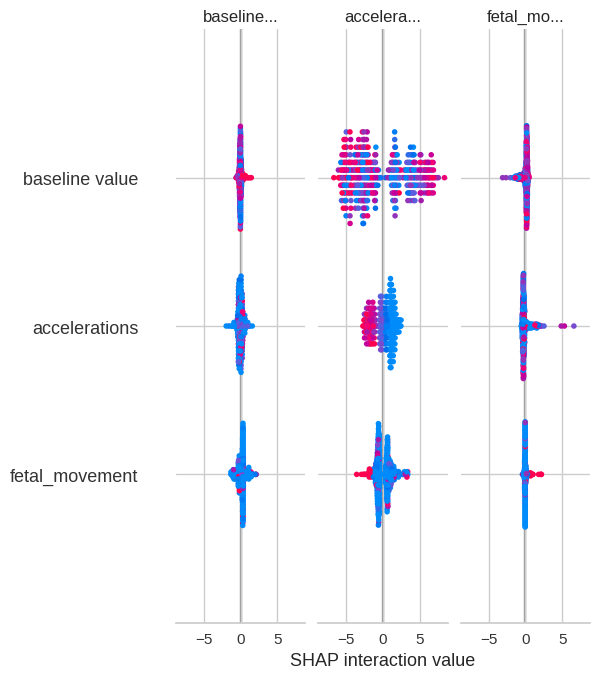

In [13]:
from pycaret.classification import interpret_model

# Interpretar o modelo
interpret_model(model)


## Conclusão
Após um estudo aprofundado da obstetrícia, fica claro que a cardiotocografia desempenha um papel importante no monitoramento rotineiro da saúde fetal durante a gravidez e o parto. Ao fornecer informações sobre a frequência cardíaca e as contrações fetais, esta técnica permite a detecção precoce de qualquer sofrimento fetal, permitindo uma intervenção oportuna para alcançar resultados ideais para mães e bebês. Neste trabalho, utilizei o programa PyCaret para modelar a distribuição da saúde uterina, utilizando um conjunto de dados real e completo. Após realizar uma análise exploratória detalhada, treinei o modelo de classificação usando o método Light Gradient Boosting Machine. Como foi mostrado, modelo alcançou uma acurácia de 0,9576, indicando notável precisão na classificação da saúde fetal.Esses resultados reforçam a tese de que a ciência de dados é de extrema importância na área da saúde.
